In [1]:
import wbdata
import pandas as pd
import datetime
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# wbdata.get_indicators()
# AG.LND.TOTL.K2                                     Land area (sq. km)
# AG.LND.TOTL.RU.K2                                  Rural land area (sq. km)
# AG.LND.TOTL.UR.K2                                  Urban land area

In [3]:
# get nodes and features
data = wbdata.get_data("AG.LND.TOTL.K2", date=(datetime.datetime(2000, 1, 1), datetime.datetime(2025, 1, 1)), skip_cache=True)

In [4]:
land_data_df = pd.json_normalize(data)

land_data_df = land_data_df[["countryiso3code", "date", "value"]]
land_data_df = land_data_df.rename(columns={"countryiso3code":"code_3",
                                            "value": "square_km"})

#merge for continent data
country_continent = pd.read_csv("countryContinent.csv", encoding="latin1")
country_continent = country_continent[["code_3", "continent", "sub_region"]]

land_data_df = pd.merge(land_data_df, country_continent, how="left", on="code_3")
land_data_df = land_data_df.dropna()
land_data_df = land_data_df.rename(columns={"date":"year"})
land_data_df

,code_3,year,square_km,continent,sub_region
1227,AFG,2022,652230.0,Asia,Southern Asia
1228,AFG,2021,652230.0,Asia,Southern Asia
1229,AFG,2020,652230.0,Asia,Southern Asia
1230,AFG,2019,652230.0,Asia,Southern Asia
1231,AFG,2018,652230.0,Asia,Southern Asia
...,...,...,...,...,...
6645,ZWE,2004,386850.0,Africa,Eastern Africa
6646,ZWE,2003,386850.0,Africa,Eastern Africa
6647,ZWE,2002,386850.0,Africa,Eastern Africa
6648,ZWE,2001,386850.0,Africa,Eastern Africa


In [5]:
# one-hot encode subregion and continent
nodes_encoded = pd.get_dummies(land_data_df, columns=['continent', 'sub_region'])
#nodes_encoded.replace({False: 0, True: 1}, inplace=True)
nodes_encoded

,code_3,year,square_km,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,sub_region_Australia and New Zealand,sub_region_Caribbean,...,sub_region_Northern Europe,sub_region_Polynesia,sub_region_South America,sub_region_South-Eastern Asia,sub_region_Southern Africa,sub_region_Southern Asia,sub_region_Southern Europe,sub_region_Western Africa,sub_region_Western Asia,sub_region_Western Europe
1227,AFG,2022,652230.0,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1228,AFG,2021,652230.0,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1229,AFG,2020,652230.0,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1230,AFG,2019,652230.0,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1231,AFG,2018,652230.0,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,ZWE,2004,386850.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6646,ZWE,2003,386850.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6647,ZWE,2002,386850.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6648,ZWE,2001,386850.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# years = range(2000, 2024)

# yearly_dfs = {}
# for year in years:
#     yearly_dfs[year] = land_data_df[land_data_df["date"]==str(year)].reset_index(drop=True)

# for year in years:
#     globals()[f'land_data_df_{year}'] = yearly_dfs[year]
    

In [7]:
# edges
distance = pd.read_stata("dist_cepii.dta")

#only countries with adjacent border
border = distance[distance["contig"]==1]

#preprocessing
distance = distance.drop(distance[distance.iso_o == distance.iso_d].index)
distance.drop(columns=["distw","distwces","smctry"], inplace=True)

In [8]:
#one hot encoding (contig, comlang_off, comlang_ethno, colony, comcol, curcol, col45)

distance_encoded = pd.get_dummies(distance, columns=["contig", "comlang_off","comlang_ethno", "colony","comcol","curcol","col45"])
#distance_encoded.replace({False: 0, True: 1}, inplace=True)
distance_encoded

,iso_o,iso_d,dist,distcap,contig_0,contig_1,comlang_off_0,comlang_off_1,comlang_ethno_0,comlang_ethno_1,colony_0,colony_1,comcol_0,comcol_1,curcol_0,curcol_1,col45_0,col45_1
1,ABW,AFG,13257.814453,13257.814453,True,False,True,False,True,False,True,False,True,False,True,False,True,False
2,ABW,AGO,9516.913086,9516.913086,True,False,True,False,True,False,True,False,True,False,True,False,True,False
3,ABW,AIA,983.268250,983.268250,True,False,True,False,False,True,True,False,True,False,True,False,True,False
4,ABW,ALB,9091.742188,9091.742188,True,False,True,False,True,False,True,False,True,False,True,False,True,False
5,ABW,AND,7572.788086,7572.788086,True,False,False,True,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50170,ZWE,YEM,3971.474121,3971.474121,True,False,True,False,True,False,True,False,False,True,True,False,True,False
50171,ZWE,YUG,7056.401855,7056.401855,True,False,True,False,True,False,True,False,True,False,True,False,True,False
50172,ZWE,ZAF,2186.205811,926.174255,False,True,False,True,False,True,True,False,True,False,True,False,True,False
50173,ZWE,ZAR,2283.061035,2283.061035,True,False,True,False,True,False,True,False,True,False,True,False,True,False


In [ ]:
years = range(2000, 2023)
yearly_distance_data = []

for year in years:
    yearly_df = distance_encoded.copy()
    yearly_df['year'] = year
    yearly_distance_data.append(yearly_df)


distance_encoded_yearly = pd.concat(yearly_distance_data, ignore_index=True)
distance_encoded_yearly

,iso_o,iso_d,dist,distcap,contig_0,contig_1,comlang_off_0,comlang_off_1,comlang_ethno_0,comlang_ethno_1,colony_0,colony_1,comcol_0,comcol_1,curcol_0,curcol_1,col45_0,col45_1,year
0,ABW,AFG,13257.814453,13257.814453,True,False,True,False,True,False,True,False,True,False,True,False,True,False,2000
1,ABW,AGO,9516.913086,9516.913086,True,False,True,False,True,False,True,False,True,False,True,False,True,False,2000
2,ABW,AIA,983.268250,983.268250,True,False,True,False,False,True,True,False,True,False,True,False,True,False,2000
3,ABW,ALB,9091.742188,9091.742188,True,False,True,False,True,False,True,False,True,False,True,False,True,False,2000
4,ABW,AND,7572.788086,7572.788086,True,False,False,True,True,False,True,False,True,False,True,False,True,False,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148891,ZWE,YEM,3971.474121,3971.474121,True,False,True,False,True,False,True,False,False,True,True,False,True,False,2022
1148892,ZWE,YUG,7056.401855,7056.401855,True,False,True,False,True,False,True,False,True,False,True,False,True,False,2022
1148893,ZWE,ZAF,2186.205811,926.174255,False,True,False,True,False,True,True,False,True,False,True,False,True,False,2022
1148894,ZWE,ZAR,2283.061035,2283.061035,True,False,True,False,True,False,True,False,True,False,True,False,True,False,2022


In [9]:
# #initialize
# G_2022 = nx.Graph()

# #nodes
# for idx, row in land_data_df_2022.iterrows():
#     G_2022.add_node(row["code_3"],
#                     land_area=row["area in km^2"],
#                     continent=row["continent"])
    
# # add continent as color
# # continents = list(set([G_2022.nodes[node]["continent"] for node in G_2022.nodes()]))

# colors = {
#     'Americas':'#1f77b4',
#     'Europe':   '#ff7f0e',
#     'Asia':     '#2ca02c',
#     'Oceania':  '#d62728',
#     'Africa':   '#9467bd'
# }
# node_colors = [colors[G_2022.nodes[node]['continent']] for node in G_2022.nodes()]


# #edges
# existing_nodes = set(G_2022.nodes())

# for idx, r in border.iterrows():
#     if r["iso_o"] in existing_nodes and r["iso_d"] in existing_nodes:
#         G_2022.add_edge(r["iso_o"], r["iso_d"], distance=r.get("dist"))

# plt.figure(figsize=(12, 8))
# pos = nx.spring_layout(G_2022)

# # node size according to land area
# node_sizes = [G_2022.nodes[node]['land_area'] / 10000 for node in G_2022.nodes()]
# nx.draw_networkx_nodes(G_2022, pos, node_color=node_colors, alpha=0.7)
# nx.draw_networkx_edges(G_2022, pos)
# nx.draw_networkx_labels(G_2022, pos, font_size=8)
# plt.show()

In [10]:
# # Print graph info
# print(f"Number of nodes: {G_2022.number_of_nodes()}")
# print(f"Number of edges: {G_2022.number_of_edges()}")

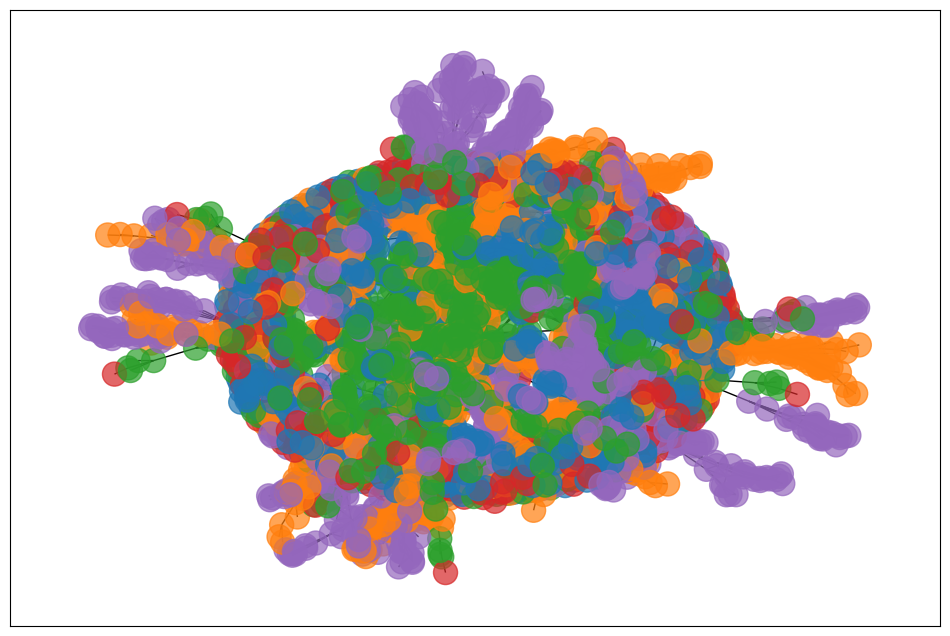

In [12]:
# whole graph

# initialize
G = nx.Graph()

#nodes
for idx, row in land_data_df.iterrows():
    node_id = f"{row['code_3']}_{row['year']}"
    G.add_node(node_id,
                    country_code = row["code_3"],
                    land_area=row["square_km"],
                    continent=row["continent"],
                    year=row["year"])

colors = {
    'Americas':'#1f77b4',
    'Europe':   '#ff7f0e',
    'Asia':     '#2ca02c',
    'Oceania':  '#d62728',
    'Africa':   '#9467bd'
}

node_colors = [colors[G.nodes[node]['continent']] for node in G.nodes()]


#edges
existing_country_codes = set([G.nodes[node]['country_code'] for node in G.nodes()])

for idx, r in border.iterrows():
    if r["iso_o"] in existing_country_codes and r["iso_d"] in existing_country_codes:
        # Finde alle Knoten für diese Länder
        nodes_o = [node for node in G.nodes() if G.nodes[node]['country_code'] == r["iso_o"]]
        nodes_d = [node for node in G.nodes() if G.nodes[node]['country_code'] == r["iso_d"]]


    for year in range(2000, 2024):
        node_o = f"{r['iso_o']}_{year}"
        node_d = f"{r['iso_d']}_{year}"
        if node_o in G.nodes() and node_d in G.nodes():
            G.add_edge(node_o, node_d, distance=r.get("dist"))

#plotten
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# node size according to land area
node_sizes = [G.nodes[node]['land_area'] / 10000 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos)
#nx.draw_networkx_labels(G, pos, font_size=8)
plt.show()

In [15]:
# Print graph info
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 4871
Number of edges: 6314


In [21]:
distance_encoded.to_parquet("edges_dist_enc.parquet", engine="fastparquet")

nodes_encoded.to_parquet("nodes_enc.parquet", engine="fastparquet")

distance_encoded_yearly.to_parquet("edges_yearly_dist_enc.parquet", engine="fastparquet")